<a href="https://colab.research.google.com/github/eyang16/ECGR_4105_ML_Fall_2025/blob/main/ECGR_4105_ML_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Homework 6
# Ethan Yang
# ID: 801250277
# ECGR_4105_Machine_Learning

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


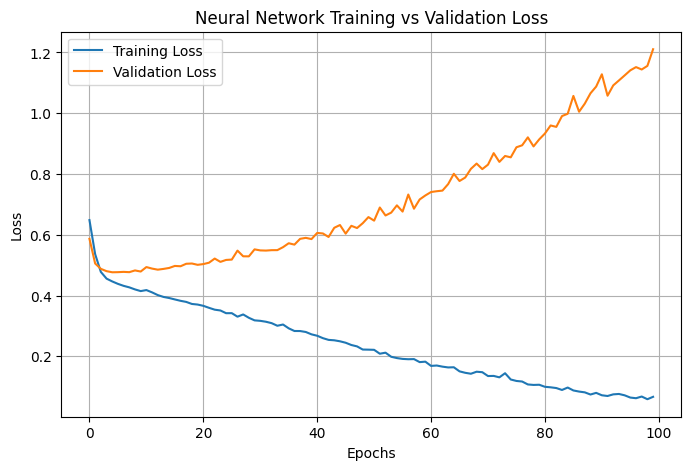

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Model Performance Comparison
                 Model  Accuracy  Precision  Recall  F1 Score
0       Neural Network    0.7208     0.5873  0.6852    0.6325
1  Logistic Regression    0.7143     0.6087  0.5185    0.5600
2                  SVM    0.7532     0.6600  0.6111    0.6346


In [ ]:
# Problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

diabetes_url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_3/diabetes.csv'
diabetes_df = pd.read_csv(diabetes_url)

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Train-test split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Fully Connected Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16,
                    verbose=0)

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate neural network
y_pred_nn = (model.predict(X_val) > 0.5).astype(int)

acc_nn = accuracy_score(y_val, y_pred_nn)
prec_nn = precision_score(y_val, y_pred_nn)
rec_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

acc_lr = accuracy_score(y_val, y_pred_lr)
prec_lr = precision_score(y_val, y_pred_lr)
rec_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

acc_svm = accuracy_score(y_val, y_pred_svm)
prec_svm = precision_score(y_val, y_pred_svm)
rec_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

# Compare results
results = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'SVM'],
    'Accuracy': [acc_nn, acc_lr, acc_svm],
    'Precision': [prec_nn, prec_lr, prec_svm],
    'Recall': [rec_nn, rec_lr, rec_svm],
    'F1 Score': [f1_nn, f1_lr, f1_svm]
})

print("\n Model Performance Comparison")
print(results.round(4))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


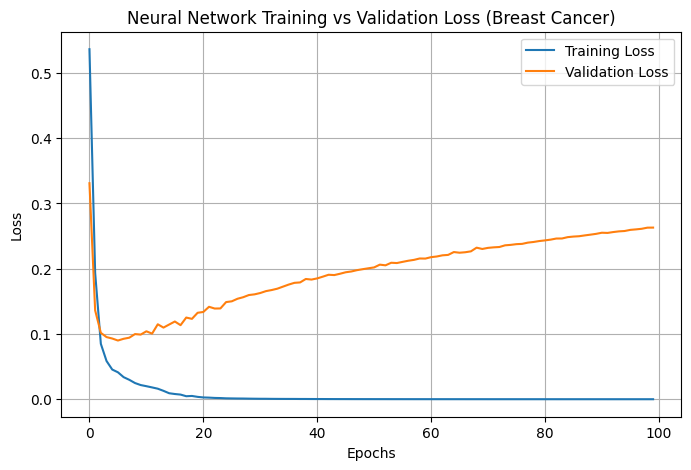

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

 Model Performance Comparison (Breast Cancer Dataset)
                 Model  Accuracy  Precision  Recall  F1 Score
0       Neural Network    0.9561     0.9855  0.9444    0.9645
1  Logistic Regression    0.9825     0.9861  0.9861    0.9861
2                  SVM    0.9825     0.9861  0.9861    0.9861


In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer_X = cancer.data
cancer_y = cancer.target

X_train, X_val, y_train, y_val = train_test_split(
    cancer_X, cancer_y, test_size=0.2, random_state=42, stratify=cancer_y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Fully Connected Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=0
)

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training vs Validation Loss (Breast Cancer)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate neural network
y_pred_nn = (model.predict(X_val) > 0.5).astype(int)

acc_nn = accuracy_score(y_val, y_pred_nn)
prec_nn = precision_score(y_val, y_pred_nn)
rec_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

acc_lr = accuracy_score(y_val, y_pred_lr)
prec_lr = precision_score(y_val, y_pred_lr)
rec_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

acc_svm = accuracy_score(y_val, y_pred_svm)
prec_svm = precision_score(y_val, y_pred_svm)
rec_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

# Compare Results
results = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'SVM'],
    'Accuracy': [acc_nn, acc_lr, acc_svm],
    'Precision': [prec_nn, prec_lr, prec_svm],
    'Recall': [rec_nn, rec_lr, rec_svm],
    'F1 Score': [f1_nn, f1_lr, f1_svm]
})

print("\n Model Performance Comparison (Breast Cancer Dataset)")
print(results.round(4))

In [ ]:
# Problem 3.a
import time
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 32x32x3 images into vectors
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# One-hot encode labels (10 classes)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build Fully Connected Neural Network (1 hidden layer)
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model and track time, loss, accuracy per epoch
num_epochs = 30
batch_size = 128

training_times = []
epoch_losses = []
epoch_accuracies = []

for epoch in range(num_epochs):
    start_time = time.time()

    history = model.fit(
        X_train, y_train_cat,
        epochs=1,
        batch_size=batch_size,
        verbose=0,
        validation_data=(X_test, y_test_cat)
    )

    epoch_time = time.time() - start_time
    training_times.append(epoch_time)
    epoch_loss = history.history['loss'][0]
    epoch_acc = history.history['val_accuracy'][0]
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_acc)

    print(f"Epoch {epoch+1:02d} | Time: {epoch_time:.2f}s | Loss: {epoch_loss:.4f} | Test Accuracy: {epoch_acc:.4f}")

# Final Evaluation
final_loss, final_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Final Test Accuracy: {final_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 01 | Time: 15.45s | Loss: 1.9780 | Test Accuracy: 0.3694
Epoch 02 | Time: 15.29s | Loss: 1.7332 | Test Accuracy: 0.3859
Epoch 03 | Time: 21.18s | Loss: 1.6526 | Test Accuracy: 0.4248
Epoch 04 | Time: 13.75s | Loss: 1.6053 | Test Accuracy: 0.4377
Epoch 05 | Time: 12.81s | Loss: 1.5722 | Test Accuracy: 0.4421
Epoch 06 | Time: 13.26s | Loss: 1.5457 | Test Accuracy: 0.4400
Epoch 07 | Time: 21.16s | Loss: 1.5200 | Test Accuracy: 0.4374
Epoch 08 | Time: 21.15s | Loss: 1.4998 | Test Accuracy: 0.4585
Epoch 09 | Time: 13.95s | Loss: 1.4815 | Test Accuracy: 0.4667
Epoch 10 | Time: 21.26s | Loss: 1.4611 | Test Accuracy: 0.4553
Epoch 11 | Time: 12.57s | Loss: 1.4582 | Test Accuracy: 0.4667
Epoch 12 | Time: 12.62s | Loss: 1.4422 | Test Accuracy: 0.4574
Epoch 13 | Time: 13.17s | Loss: 1.4294 | Test Accuracy: 0.4761
Epoch 14 | Time: 21.53s | Loss: 1.4171 | Test Accuracy: 0.4708
Epoch 15 | Time: 12.73s | Loss: 1.4020 | Test Accuracy: 0.4734
Epoch 16 | Time: 12.70s | Loss: 1.3914 | Test Accuracy:

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images (32x32x3 = 3072 features)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build extended fully connected network (3 hidden layers)
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train for 300 epochs and measure total time
start_time = time.time()

history = model.fit(
    X_train, y_train_cat,
    epochs=300,
    batch_size=128,
    verbose=1,
    validation_data=(X_test, y_test_cat)
)

total_training_time = time.time() - start_time

# Final evaluation
final_loss, final_acc = model.evaluate(X_test, y_test_cat, verbose=0)

print("\n==============================================")
print(f"Total Training Time: {total_training_time/60:.2f} minutes")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Test Accuracy: {final_acc:.4f}")
print("==============================================")

Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.2398 - loss: 2.1111 - val_accuracy: 0.3687 - val_loss: 1.7342
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.3835 - loss: 1.7142 - val_accuracy: 0.4167 - val_loss: 1.6461
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.4209 - loss: 1.6115 - val_accuracy: 0.4464 - val_loss: 1.5462
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4522 - loss: 1.5376 - val_accuracy: 0.4531 - val_loss: 1.5225
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.4694 - loss: 1.4893 - val_accuracy: 0.4568 - val_loss: 1.5201
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.4755 - loss: 1.4609 - val_accuracy: 0.4818 - val_loss: 1.4668
Epoch 7/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.4899 - loss: 1.4315 - val_accuracy: 0.4817 - val_loss: 1.4594
Epoch 8/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5039 - loss: 1